In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c human-activity-recognition-har


ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20          11091        234  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           8521        173  1.0              
dataanalyst001/world-population-by-country-2024                 World Population by country 2024                   6KB  2024-07-04 09:47:58           1181         26  1.0              
ihelon/coffee-sales                                             Coffee Sale

In [2]:
!unzip /content/human-activity-recognition-har.zip

Archive:  /content/human-activity-recognition-har.zip
  inflating: HAR/test/003d40b5-56ed-43cc-a4cc-5c901d542afc.csv  
  inflating: HAR/test/004c721f-2a5c-45ca-9faa-54b0c5e2188b.csv  
  inflating: HAR/test/005af30b-08f6-4695-9509-41a9f2722c2e.csv  
  inflating: HAR/test/00975e94-b081-4c14-962f-026acc55d9f3.csv  
  inflating: HAR/test/00dccf4d-375c-4d95-9441-7ff0d3687314.csv  
  inflating: HAR/test/011f5906-a428-40dd-b55d-bf4c91fcc6fe.csv  
  inflating: HAR/test/015180f5-89d6-4e06-91a0-bd3800c1738e.csv  
  inflating: HAR/test/016c611d-5203-4711-a053-aaa1ca0074d6.csv  
  inflating: HAR/test/024047f3-03c6-4685-979d-e28428c294bc.csv  
  inflating: HAR/test/02449fc9-1eae-431f-aa48-8d9dfa7df510.csv  
  inflating: HAR/test/029f4223-443a-4f38-a770-d0896c316969.csv  
  inflating: HAR/test/02d246ba-050b-42c0-af6e-9bd4ad1b233b.csv  
  inflating: HAR/test/02e01832-1605-476c-997c-9cbb82508915.csv  
  inflating: HAR/test/0301b246-686a-441f-800f-5ff474fd60ab.csv  
  inflating: HAR/test/03102e41-ed1a-

# Import Library

In [3]:
!pip install natsort

In [4]:
import os, os.path as osp
from glob import glob
from natsort import os_sorted
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

<hr>
<hr>

In [5]:
# 0/0

# Input parameter

In [41]:
# Input folder data
input_dir = '/content/HAR'

# split train folder into train and validation
split_train = 0.8
# split_train = 0.9


# Parameter for data segmentation
frame_len = 100
hop_len = 50

# # Parameter for models
# epochs = 100 #3
# batch_size = 64 #64

# Load csv path

In [42]:
train_dir = input_dir + '/train'
test_dir = input_dir + '/test'
df_paths = glob(osp.join(train_dir, '*', '*.csv'))

# Visualize DataFrame

In [43]:
def plot_activity(activity,df,start=0,stop=200):
    df = df.iloc[start:stop]

    ax = df.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

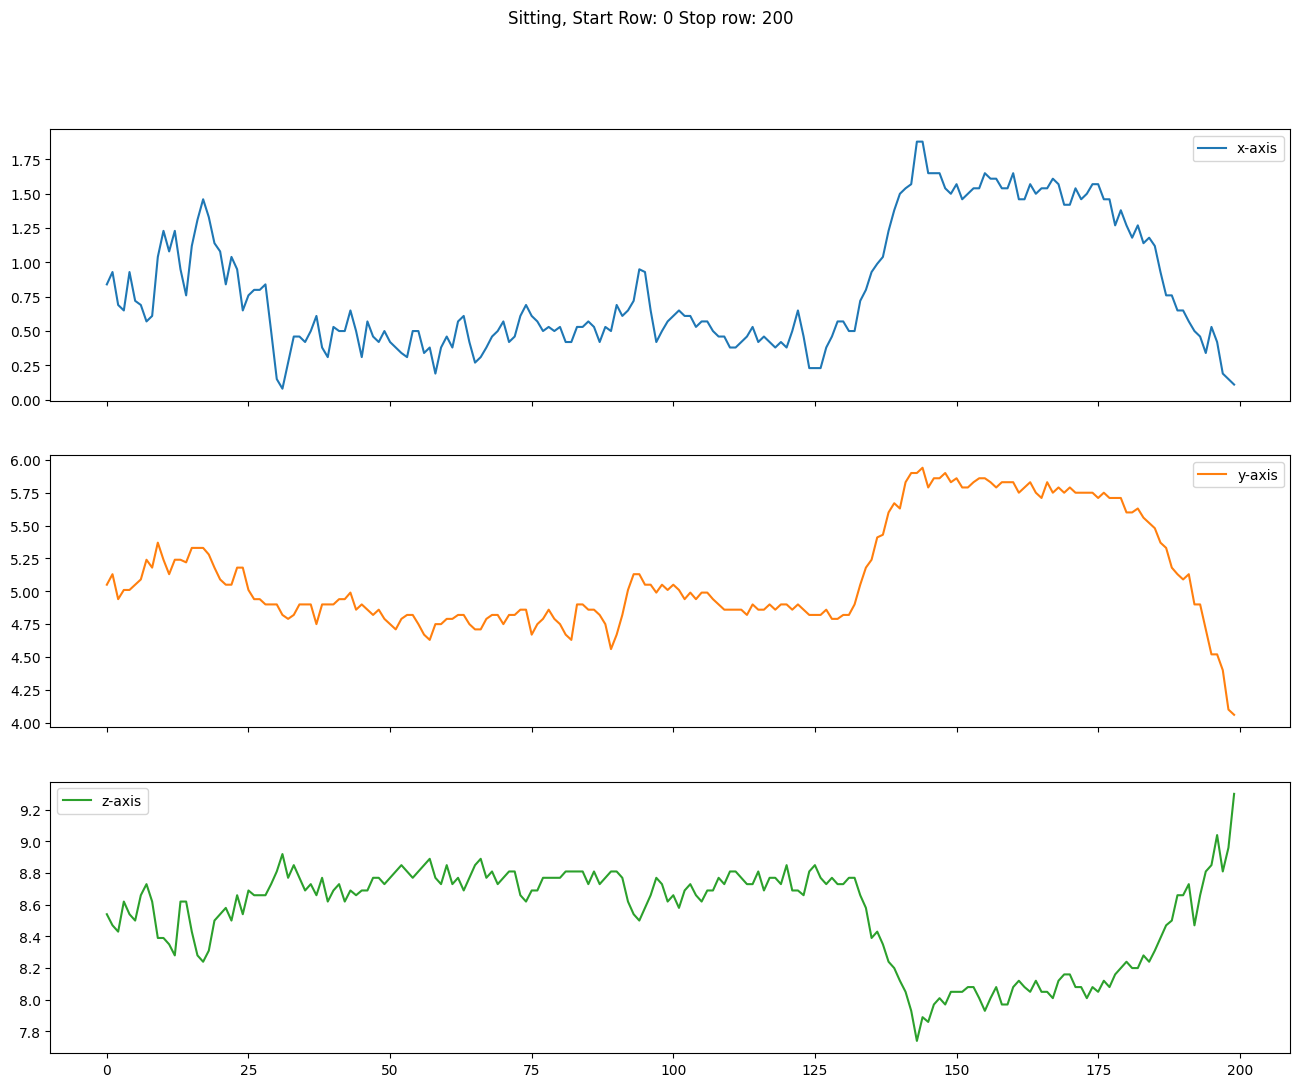

In [44]:
path = df_paths[0]
activity, filename = path.split('/')[-2:]
df = pd.read_csv(path)
plot_activity(activity, df)

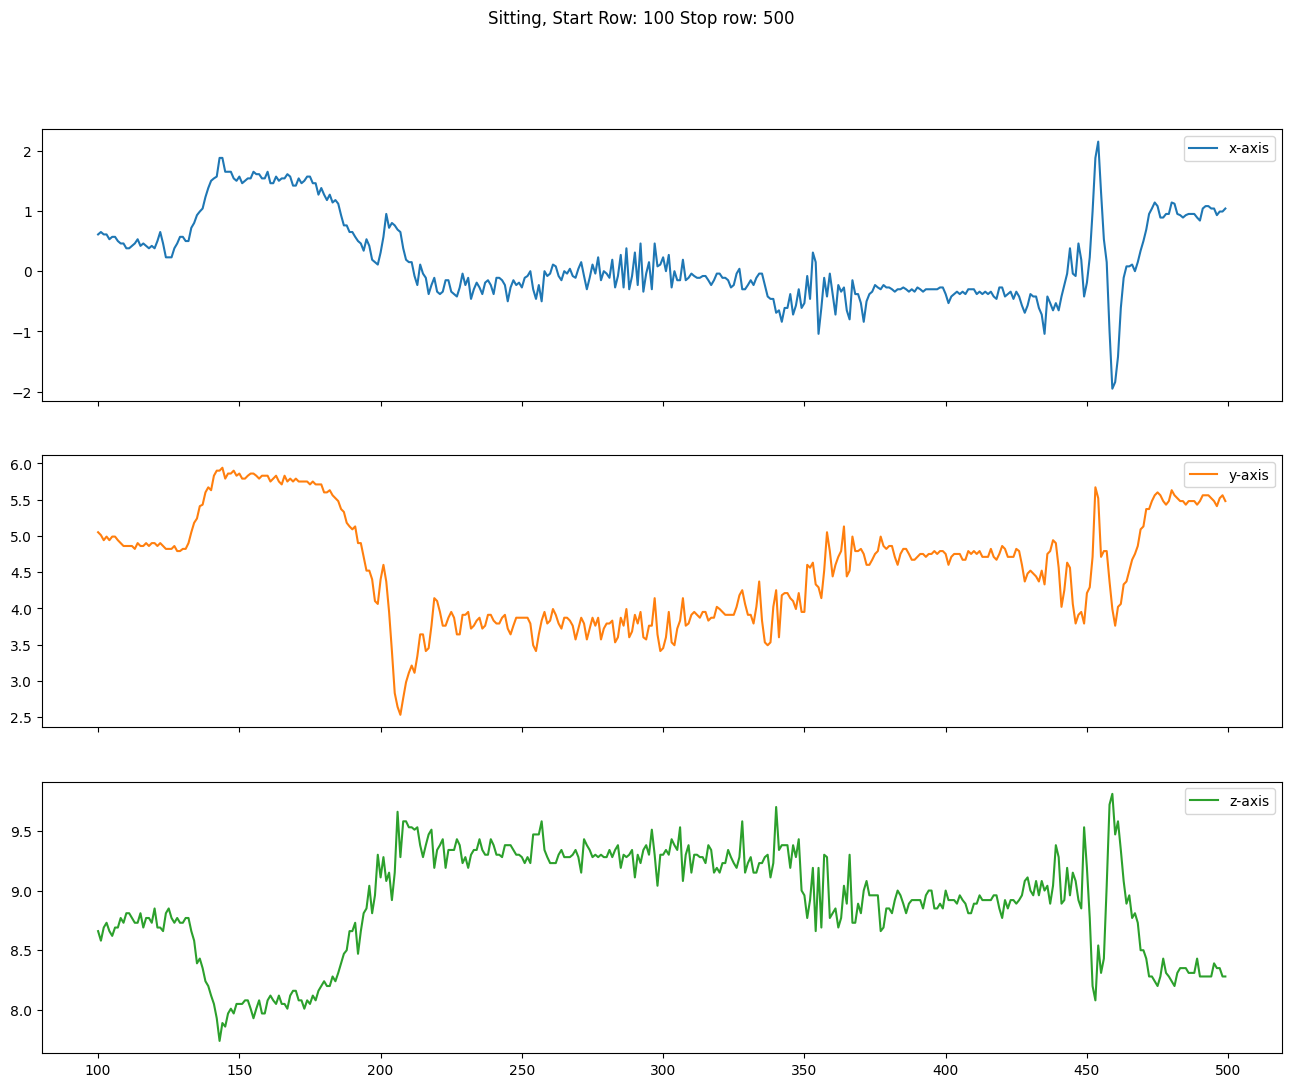

In [45]:
plot_activity(activity,df,100,500)

Sitting


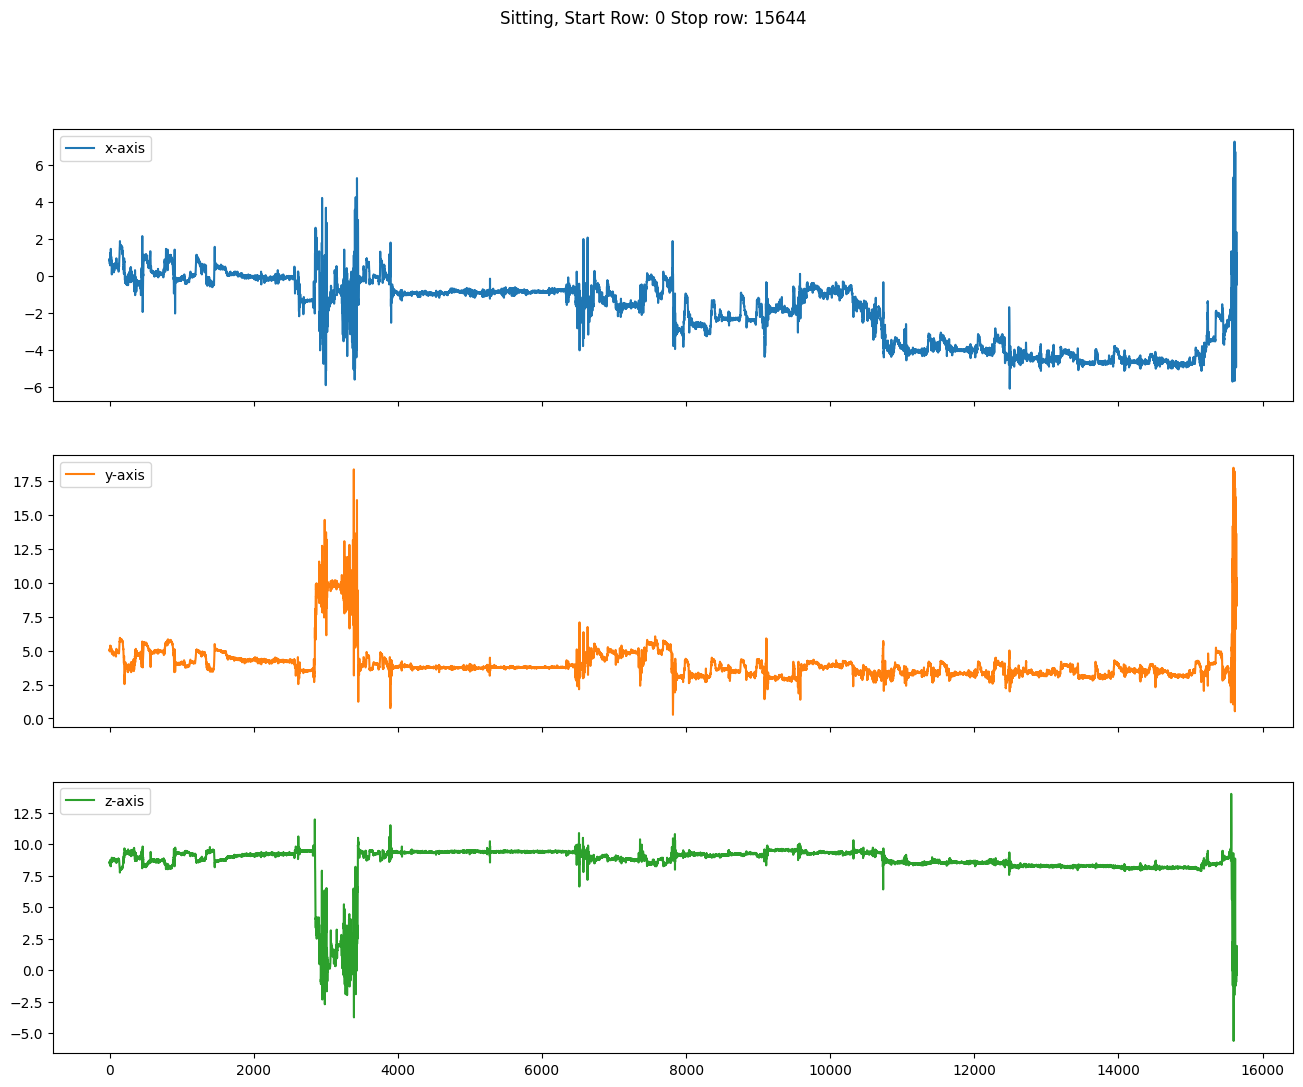

In [46]:
path = df_paths[0]
activity, filename = path.split('/')[-2:]
print(activity)
df = pd.read_csv(path)
plot_activity(activity, df,
              start=0,
              stop=15644 )

<hr>

# Training, Validation Data

We'll use 80% of the measurements for training and validation.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
glob(osp.join("/content/HAR/train/Sitting",'*.csv'))

['/content/HAR/train/Sitting/20.csv',
 '/content/HAR/train/Sitting/21.csv',
 '/content/HAR/train/Sitting/12.csv',
 '/content/HAR/train/Sitting/4.csv',
 '/content/HAR/train/Sitting/24.csv',
 '/content/HAR/train/Sitting/7.csv',
 '/content/HAR/train/Sitting/6.csv',
 '/content/HAR/train/Sitting/30.csv',
 '/content/HAR/train/Sitting/3.csv',
 '/content/HAR/train/Sitting/35.csv',
 '/content/HAR/train/Sitting/27.csv',
 '/content/HAR/train/Sitting/13.csv',
 '/content/HAR/train/Sitting/16.csv',
 '/content/HAR/train/Sitting/5.csv',
 '/content/HAR/train/Sitting/8.csv',
 '/content/HAR/train/Sitting/19.csv',
 '/content/HAR/train/Sitting/18.csv']

In [49]:
dataset_paths = {'train': [],
                 'val': []
                }

for activity_dir in glob(osp.join(train_dir, '*')):      # ทุกๆ folder Sitting, Jogging, ... Downstairs
    paths = glob(osp.join(activity_dir, '*.csv'))        # เปิดทุกๆ ไฟล์ .csv ใน โฟลเดอร์ต่างๆ
    train_paths, val_paths = train_test_split(paths,test_size= (1-split_train ),random_state=42)  # แบ่งอัตรส่วนของแต่ละไฟล์
    dataset_paths['train'].extend(train_paths)
    dataset_paths['val'].extend(val_paths)

In [50]:
len(dataset_paths['train']), len(dataset_paths['val'])

(111, 32)

In [51]:
dataset_paths

{'train': ['/content/HAR/train/Sitting/13.csv',
  '/content/HAR/train/Sitting/8.csv',
  '/content/HAR/train/Sitting/3.csv',
  '/content/HAR/train/Sitting/5.csv',
  '/content/HAR/train/Sitting/12.csv',
  '/content/HAR/train/Sitting/35.csv',
  '/content/HAR/train/Sitting/18.csv',
  '/content/HAR/train/Sitting/24.csv',
  '/content/HAR/train/Sitting/30.csv',
  '/content/HAR/train/Sitting/27.csv',
  '/content/HAR/train/Sitting/16.csv',
  '/content/HAR/train/Sitting/4.csv',
  '/content/HAR/train/Sitting/6.csv',
  '/content/HAR/train/Jogging/26.csv',
  '/content/HAR/train/Jogging/20.csv',
  '/content/HAR/train/Jogging/15.csv',
  '/content/HAR/train/Jogging/4.csv',
  '/content/HAR/train/Jogging/21.csv',
  '/content/HAR/train/Jogging/35.csv',
  '/content/HAR/train/Jogging/10.csv',
  '/content/HAR/train/Jogging/12.csv',
  '/content/HAR/train/Jogging/2.csv',
  '/content/HAR/train/Jogging/22.csv',
  '/content/HAR/train/Jogging/5.csv',
  '/content/HAR/train/Jogging/17.csv',
  '/content/HAR/train/Jo

In [145]:
dataset_paths = {'train': ['/content/HAR/train/Sitting/13.csv',
  '/content/HAR/train/Sitting/8.csv',
  '/content/HAR/train/Sitting/3.csv',
  '/content/HAR/train/Sitting/5.csv',
  '/content/HAR/train/Sitting/12.csv',
  '/content/HAR/train/Sitting/35.csv',
  '/content/HAR/train/Sitting/18.csv',
  '/content/HAR/train/Sitting/24.csv',
  '/content/HAR/train/Sitting/30.csv',
  '/content/HAR/train/Sitting/27.csv',
  '/content/HAR/train/Sitting/16.csv',
  '/content/HAR/train/Sitting/4.csv',
  '/content/HAR/train/Sitting/6.csv',
  '/content/HAR/train/Jogging/11.csv',
  '/content/HAR/train/Jogging/19.csv',
  '/content/HAR/train/Jogging/7.csv',
  '/content/HAR/train/Jogging/3.csv',
  '/content/HAR/train/Jogging/27.csv',
  '/content/HAR/train/Jogging/8.csv',
  '/content/HAR/train/Jogging/24.csv',
  '/content/HAR/train/Walking/13.csv',
  '/content/HAR/train/Walking/11.csv',
  '/content/HAR/train/Walking/5.csv',
  '/content/HAR/train/Walking/24.csv',
  '/content/HAR/train/Walking/6.csv',
  '/content/HAR/train/Walking/35.csv',
  '/content/HAR/train/Walking/16.csv',
  '/content/HAR/train/Walking/4.csv',
  '/content/HAR/train/Upstairs/26.csv',
  '/content/HAR/train/Upstairs/20.csv',
  '/content/HAR/train/Upstairs/15.csv',
  '/content/HAR/train/Upstairs/4.csv',
  '/content/HAR/train/Upstairs/28.csv',
  '/content/HAR/train/Upstairs/1.csv',
  '/content/HAR/train/Upstairs/10.csv',
  '/content/HAR/train/Upstairs/21.csv',
  '/content/HAR/train/Upstairs/12.csv',
  '/content/HAR/train/Upstairs/22.csv',
  '/content/HAR/train/Upstairs/16.csv',
  '/content/HAR/train/Upstairs/17.csv',
  '/content/HAR/train/Upstairs/5.csv',
  '/content/HAR/train/Upstairs/11.csv',
  '/content/HAR/train/Upstairs/19.csv',
  '/content/HAR/train/Upstairs/7.csv',
  '/content/HAR/train/Upstairs/30.csv',
  '/content/HAR/train/Upstairs/27.csv',
  '/content/HAR/train/Upstairs/8.csv',
  '/content/HAR/train/Upstairs/24.csv',
  '/content/HAR/train/Standing/12.csv',
  '/content/HAR/train/Standing/16.csv',
  '/content/HAR/train/Standing/19.csv',
  '/content/HAR/train/Standing/8.csv',
  '/content/HAR/train/Standing/10.csv',
  '/content/HAR/train/Standing/21.csv',
  '/content/HAR/train/Standing/35.csv',
  '/content/HAR/train/Standing/18.csv',
  '/content/HAR/train/Standing/24.csv',
  '/content/HAR/train/Standing/13.csv',
  '/content/HAR/train/Standing/30.csv',
  '/content/HAR/train/Standing/27.csv',
  '/content/HAR/train/Standing/5.csv',
  '/content/HAR/train/Standing/6.csv',
  '/content/HAR/train/Downstairs/26.csv',
  '/content/HAR/train/Downstairs/20.csv',
  '/content/HAR/train/Downstairs/15.csv',
  '/content/HAR/train/Downstairs/4.csv',
  '/content/HAR/train/Downstairs/28.csv',
  '/content/HAR/train/Downstairs/1.csv',
  '/content/HAR/train/Downstairs/10.csv',
  '/content/HAR/train/Downstairs/21.csv',
  '/content/HAR/train/Downstairs/12.csv',
  '/content/HAR/train/Downstairs/22.csv',
  '/content/HAR/train/Downstairs/16.csv',
  '/content/HAR/train/Downstairs/17.csv',
  '/content/HAR/train/Downstairs/5.csv',
  '/content/HAR/train/Downstairs/11.csv',
  '/content/HAR/train/Downstairs/19.csv',
  '/content/HAR/train/Downstairs/7.csv',
  '/content/HAR/train/Downstairs/30.csv',
  '/content/HAR/train/Downstairs/27.csv',
  '/content/HAR/train/Downstairs/8.csv',
  '/content/HAR/train/Downstairs/24.csv'],
 'val': ['/content/HAR/train/Sitting/20.csv',
  '/content/HAR/train/Sitting/21.csv',
  '/content/HAR/train/Sitting/7.csv',
  '/content/HAR/train/Sitting/19.csv',
  '/content/HAR/train/Jogging/14.csv',
  '/content/HAR/train/Jogging/13.csv',
  '/content/HAR/train/Jogging/23.csv',
  '/content/HAR/train/Jogging/18.csv',
  '/content/HAR/train/Jogging/1.csv',
  '/content/HAR/train/Jogging/6.csv',
  '/content/HAR/train/Walking/15.csv',
  '/content/HAR/train/Walking/26.csv',
  '/content/HAR/train/Walking/8.csv',
  '/content/HAR/train/Walking/10.csv',
  '/content/HAR/train/Walking/7.csv',
  '/content/HAR/train/Walking/14.csv',
  '/content/HAR/train/Upstairs/14.csv',
  '/content/HAR/train/Upstairs/13.csv',
  '/content/HAR/train/Upstairs/23.csv',
  '/content/HAR/train/Upstairs/18.csv',
  '/content/HAR/train/Upstairs/3.csv',
  '/content/HAR/train/Upstairs/6.csv',
  '/content/HAR/train/Standing/20.csv',
  '/content/HAR/train/Standing/28.csv',
  '/content/HAR/train/Standing/3.csv',
  '/content/HAR/train/Standing/7.csv',
  '/content/HAR/train/Downstairs/14.csv',
  '/content/HAR/train/Downstairs/13.csv',
  '/content/HAR/train/Downstairs/23.csv',
  '/content/HAR/train/Downstairs/18.csv',
  '/content/HAR/train/Downstairs/3.csv',
  '/content/HAR/train/Downstairs/6.csv']}

<hr>

# Load Dataset

In [146]:
def frame(x, frame_len, hop_len):
    '''Slice a 3D data array into (overlapping) frames.

    Example
    --------
    >>> x = np.array([[0, 1, 2],
                      [10, 11, 12],
                      [20, 21, 22],
                      [30, 31, 32],
                      [40, 41, 42],
                      [50, 51, 52],
                      [60, 61, 62]])
    >>> frames = x.frame(x, 3, 2)
    >>> x.shape
    (7, 3)
    >>> frames.shape
    (3, 3, 3)
    '''

    assert(x.shape[0] >= frame_len)
    assert(hop_len >= 1)

    n_frames = 1 + (x.shape[0] - frame_len) // hop_len
    shape = (n_frames, frame_len, x.shape[1])
    strides = ((hop_len * x.strides[0],) + x.strides)
    return np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)

**Load and preprocess data**

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
dataset_blocks = {'train': {'block': [], 'label': []},
                  'val': {'block': [], 'label': []}}

for dataset in ['train', 'val']:
    paths = dataset_paths[dataset]

    for path in paths:
        activity = path.split(os.sep)[-2]
        df = pd.read_csv(path)

        # Preprocessing
        mms = StandardScaler()
        for feature in list(df.columns):
            df[feature] = mms.fit_transform(df[[feature]])

        samples = frame(df.loc[:, ].values, frame_len, hop_len)
        labels = np.full(samples.shape[0], activity)

        dataset_blocks[dataset]['block'].extend(samples)
        dataset_blocks[dataset]['label'].extend(labels)

    dataset_blocks[dataset]['block'] = np.array(dataset_blocks[dataset]['block'])
    dataset_blocks[dataset]['label'] = np.array(dataset_blocks[dataset]['label'])

In [149]:
dataset_blocks['train']['block'].shape, dataset_blocks['val']['block'].shape

((6853, 100, 3), (4515, 100, 3))

In [150]:
dataset_blocks['val']['label'][:10]

array(['Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting',
       'Sitting', 'Sitting', 'Sitting', 'Sitting'], dtype='<U10')

In [151]:
dataset_blocks['train']['block']

array([[[-1.20553146e-01,  2.04731375e+00, -1.85004582e-01],
        [-7.41788716e-01,  1.42502298e+00, -1.85004582e-01],
        [-7.41788716e-01,  1.42502298e+00, -3.65269377e-01],
        ...,
        [-2.51339582e-01,  6.36788013e-01, -2.88013036e-01],
        [-3.82126017e-01,  4.70843809e-01, -3.65269377e-01],
        [-3.82126017e-01,  6.36788013e-01, -2.88013036e-01]],

       [[-1.20553146e-01,  4.70843809e-01, -3.65269377e-01],
        [-1.20553146e-01,  6.36788013e-01, -2.88013036e-01],
        [-2.51339582e-01,  7.19760115e-01, -3.65269377e-01],
        ...,
        [-2.51339582e-01,  9.74693483e-02, -4.68277831e-01],
        [-2.51339582e-01,  9.74693483e-02, -4.68277831e-01],
        [ 1.02332898e-02,  6.36788013e-01, -8.19961276e-02]],

       [[-2.51339582e-01,  6.36788013e-01, -1.85004582e-01],
        [-2.51339582e-01,  6.36788013e-01, -2.88013036e-01],
        [-1.20553146e-01,  4.70843809e-01, -1.85004582e-01],
        ...,
        [ 7.62255295e-01,  6.36788013e-01,

<hr>

**One Hot Encode Labels**

In [152]:
LABELS = os_sorted([osp.split(path)[-1] for path in glob(osp.join(train_dir, '*'))])
LABELS

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

In [153]:
for dataset in ['train', 'val']:
    labels = dataset_blocks[dataset]['label']
    one_hot_encoded = np.zeros((labels.size, len(LABELS)))

    for i, label in enumerate(LABELS):
        index = np.where(labels == label)[0]
        one_hot_encoded[index, i] = 1

    dataset_blocks[dataset]['label'] = one_hot_encoded

In [154]:
dataset_blocks['train']

{'block': array([[[-1.20553146e-01,  2.04731375e+00, -1.85004582e-01],
         [-7.41788716e-01,  1.42502298e+00, -1.85004582e-01],
         [-7.41788716e-01,  1.42502298e+00, -3.65269377e-01],
         ...,
         [-2.51339582e-01,  6.36788013e-01, -2.88013036e-01],
         [-3.82126017e-01,  4.70843809e-01, -3.65269377e-01],
         [-3.82126017e-01,  6.36788013e-01, -2.88013036e-01]],
 
        [[-1.20553146e-01,  4.70843809e-01, -3.65269377e-01],
         [-1.20553146e-01,  6.36788013e-01, -2.88013036e-01],
         [-2.51339582e-01,  7.19760115e-01, -3.65269377e-01],
         ...,
         [-2.51339582e-01,  9.74693483e-02, -4.68277831e-01],
         [-2.51339582e-01,  9.74693483e-02, -4.68277831e-01],
         [ 1.02332898e-02,  6.36788013e-01, -8.19961276e-02]],
 
        [[-2.51339582e-01,  6.36788013e-01, -1.85004582e-01],
         [-2.51339582e-01,  6.36788013e-01, -2.88013036e-01],
         [-1.20553146e-01,  4.70843809e-01, -1.85004582e-01],
         ...,
         [ 7.

In [155]:
dataset_blocks['val']['label'][:10]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

<hr>

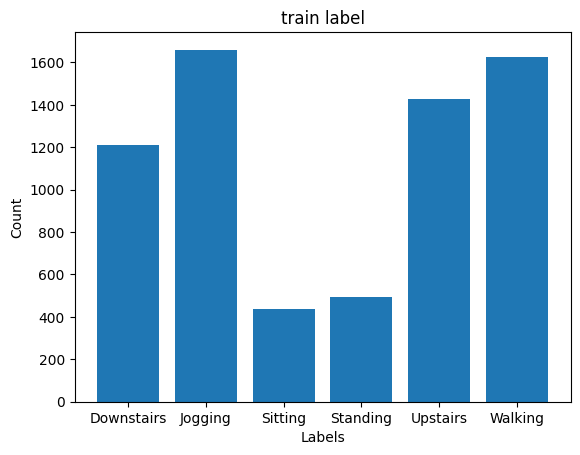

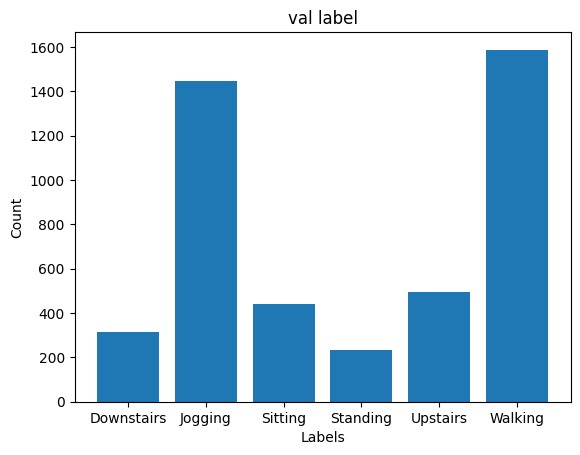

In [156]:
for dataset in ['train', 'val']:
    labels = dataset_blocks[dataset]['label']

    labels_sum = labels.sum(axis=0)

    # Plotting
    plt.bar(LABELS, labels_sum)
    plt.title(f'{dataset} label')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [157]:
0/0

ZeroDivisionError: division by zero

**Visualize**

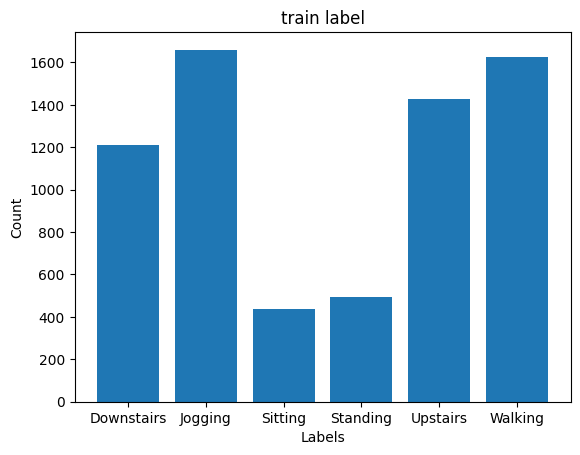

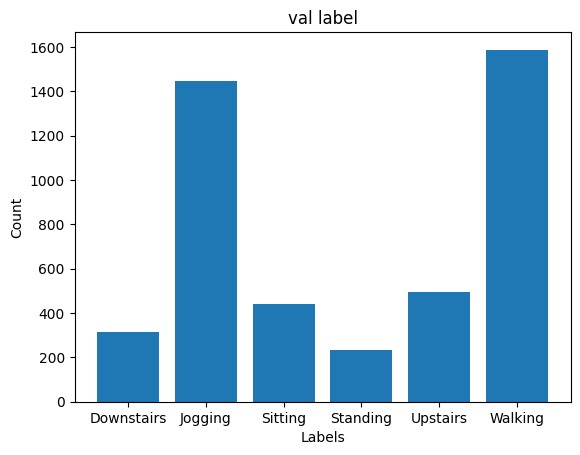

In [158]:
for dataset in ['train', 'val']:
    labels = dataset_blocks[dataset]['label']

    labels_sum = labels.sum(axis=0)

    # Plotting
    plt.bar(LABELS, labels_sum)
    plt.title(f'{dataset} label')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
# 0/0

# Model

In [159]:
# Get the input shape -> (samples, time steps, features)
X_train = dataset_blocks['train']['block']
Y_train = dataset_blocks['train']['label']

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features,n_outputs))

n_timesteps: 100, n_features: 3, n_outputs: 6


In [160]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Input, Dense, Dropout, Flatten

In [161]:
# # model 1
# model = Sequential()
# model.add(Input(shape=(n_timesteps,n_features)))
# model.add(Conv1D(16, 8, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Flatten())
# model.add(Dense(n_outputs, activation='softmax'))


# model.summary()

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LSTM

In [163]:
model = Sequential()
model.add(Input(shape=(n_timesteps, n_features)))
model.add(Conv1D(64, 8, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 8, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 93, 64)            1600      
                                                                 
 batch_normalization_4 (Bat  (None, 93, 64)            256       
 chNormalization)                                                
                                                                 
 conv1d_5 (Conv1D)           (None, 86, 128)           65664     
                                                                 
 batch_normalization_5 (Bat  (None, 86, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 43, 128)           0         
 g1D)                                                            
                                                      

**Training**

In [170]:
# Parameter for models
epochs = 10 #3
batch_size = 64 #64

In [171]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath= '/content/working/best_cnn_model.weights5.h5',
        monitor='val_loss', save_best_only=True, save_weights_only=True
    ),
]

In [172]:
history = model.fit(dataset_blocks['train']['block'],
                    dataset_blocks['train']['label'],
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(dataset_blocks['val']['block'],
                                     dataset_blocks['val']['label']),
                    callbacks=callbacks_list,
                    verbose=1)

Epoch 1/10
108/108 [==============================] - 6s 20ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 2.0550 - val_accuracy: 0.7012
Epoch 2/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 1.5695 - val_accuracy: 0.7745
Epoch 3/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 2.1296 - val_accuracy: 0.7143
Epoch 4/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 2.0645 - val_accuracy: 0.7353
Epoch 5/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 1.5930 - val_accuracy: 0.7524
Epoch 6/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 1.7589 - val_accuracy: 0.7331
Epoch 7/10
108/108 [==============================] - 1s 12ms/step - loss: 0.0341 - accuracy: 0.9908 - val_loss: 1.9101 - val_accuracy: 0.7145

In [173]:
# import matplotlib.pyplot as plt

# history_dict = history.history

# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'b', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

**Validation**

In [174]:
# Load the best model
# model.load_weights('best_model.h5')

# evaluate model
loss, accuracy = model.evaluate(dataset_blocks['val']['block'],
                                dataset_blocks['val']['label'], batch_size=batch_size, verbose=0)
print(f'Loss : {loss}')
print(f'Accuracy: {accuracy}')

Loss : 1.4933555126190186
Accuracy: 0.7940199375152588


In [175]:
0/0

ZeroDivisionError: division by zero

# Submission

In [ ]:
from sklearn.preprocessing import StandardScaler

answer_list = []

for filename in tqdm(glob(test_dir + '/*.csv')):

    # Read test csv file
    df = pd.read_csv(filename)

    # Preprocessing
    mms = StandardScaler()
    for feature in list(df.columns):
        df[feature] = mms.fit_transform(df[[feature]])

    samples = df.loc[:, ].values

    # Predict
    y_pred_prob = model.predict(np.array(samples).reshape(-1,frame_len,n_features), verbose = 0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    class_names = LABELS[y_pred[0]]

    value = (filename.split('/')[-1], class_names)
    answer_list.append(value)

In [ ]:
import pandas as pd
column_name = ['id','class']
xml_df = pd.DataFrame(answer_list, columns=column_name)
xml_df.to_csv('/content/v.2.0.0.csv', index=None)